In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('xtrain shape: ',x_train.shape)

xtrain shape:  (60000, 28, 28)


In [4]:
print('xtest shape: ',x_test.shape)

xtest shape:  (10000, 28, 28)


#Data Pre-processing

changing the shape of x_train and x_test, i.e. flattening it from a two dimensional to a single dimensional array.

784=28*28

In [5]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [6]:
x_train= x_train/255                          #Normalizing the input
x_test= x_test/255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

60000 train samples
10000 test samples


#Model

In [8]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4704 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9260


In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2681 - accuracy: 0.9247


[0.26805201172828674, 0.9247000217437744]

In [10]:
model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


array([[1.7323377e-02, 3.2696744e-07, 7.9273894e-02, ..., 9.9989420e-01,
        9.8465383e-02, 7.1071893e-01],
       [2.1304649e-01, 2.7177162e-03, 9.9974883e-01, ..., 8.0058968e-13,
        1.3913457e-01, 1.2147026e-09],
       [2.7810730e-04, 9.9218702e-01, 7.1576506e-01, ..., 1.2221179e-01,
        3.5906270e-01, 5.7981446e-02],
       ...,
       [2.3003486e-06, 1.7079317e-06, 2.1557875e-03, ..., 2.7243218e-01,
        4.4228512e-01, 8.1930822e-01],
       [5.3245007e-05, 8.5363194e-05, 2.2446518e-04, ..., 3.8103251e-05,
        6.0055184e-01, 1.6962639e-04],
       [2.8922434e-03, 1.4389878e-10, 2.3158437e-01, ..., 1.8233498e-08,
        1.3209916e-04, 1.0755497e-06]], dtype=float32)

In [16]:
y_predicted=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
confusion=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confusion

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    4,    2,    0,    8,    8,    5,    2,    1],
       [   0, 1108,    5,    2,    0,    2,    4,    2,   12,    0],
       [   3,    4,  951,   11,    7,    5,   11,   11,   24,    5],
       [   1,    0,   25,  927,    0,   20,    2,   12,   14,    9],
       [   1,    1,    8,    1,  905,    0,   10,    4,    6,   46],
       [   7,    2,    7,   37,    9,  781,   12,    6,   23,    8],
       [   7,    3,    9,    1,    7,   18,  910,    2,    1,    0],
       [   1,    5,   25,    5,    6,    0,    0,  955,    1,   30],
       [   6,    7,   12,   29,   10,   38,    9,   13,  833,   17],
       [   9,    6,    2,   10,   22,    7,    0,   21,    5,  927]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'True')

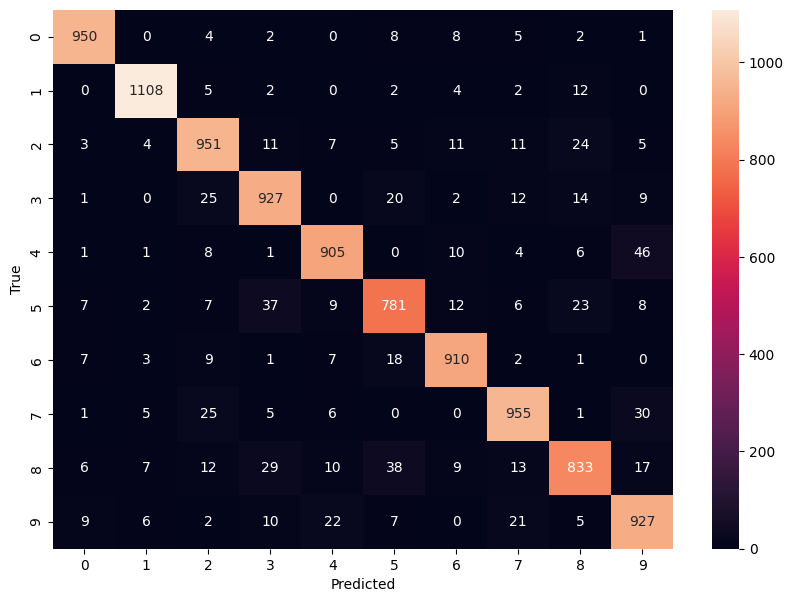

In [21]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [12]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print('Accuracy: ', test_acc)


313/313 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9247
Accuracy:  0.9247000217437744
